# PFCS data

## Init

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from data.PFCS.scripts.gt_plot import read_data
from pathlib import Path
from pprint import pprint

# from sktime.clustering.dbscan import TimeSeriesDBSCAN
# from sklearn.metrics.pairwise import pairwise_distances
# from sklearn import metrics
# from sklearn.cluster import DBSCAN
from scipy import signal

In [2]:
from GPSegmentation import GPSegmentation
from main import DIM, NCLASS, MAX_LEN, MIN_LEN, AVE_LEN, SKIP_LEN

/home/kir0ul/Projects/GP-HSMM/data/PFCS/table task/export/fetch_recorded_demo_1730997119_0.txt
/home/kir0ul/Projects/GP-HSMM/data/PFCS/table task/export/fetch_recorded_demo_1730997530_1.txt
/home/kir0ul/Projects/GP-HSMM/data/PFCS/table task/export/fetch_recorded_demo_1730997735_2.txt
/home/kir0ul/Projects/GP-HSMM/data/PFCS/table task/export/fetch_recorded_demo_1730997956_3.txt
DIM = 3


In [3]:
# %matplotlib ipympl

## Get data + preprocessing

In [4]:
task_ground_truth = [
    {
        "filename": "fetch_recorded_demo_1730997119",
        "idx": {
            "plate": {"ini": 0, "end": 1125},
            "napkin": {"ini": 1125, "end": 2591},
            "cup": {"ini": 2591, "end": 3986},
            "fork": {"ini": 3986, "end": 5666},
            "spoon": {"ini": 5666, "end": 7338},
        },
    },
    {
        "filename": "fetch_recorded_demo_1730997530",
        "idx": {
            "plate": {"ini": 0, "end": 1812},
            "napkin": {"ini": 1812, "end": 3844},
            "cup": {"ini": 3844, "end": 5732},
            "fork": {"ini": 5732, "end": 7090},
            "spoon": {"ini": 7090, "end": 7955},
        },
    },
    {
        "filename": "fetch_recorded_demo_1730997735",
        "idx": {
            "plate": {"ini": 0, "end": 1965},
            "napkin": {"ini": 1965, "end": 4178},
            "cup": {"ini": 4178, "end": 6427},
            "spoon": {"ini": 6427, "end": 7904},
            "fork": {"ini": 7904, "end": 9123},
        },
    },
    {
        "filename": "fetch_recorded_demo_1730997956",
        "idx": {
            "plate": {"ini": 0, "end": 1898},
            "napkin": {"ini": 1898, "end": 4081},
            "cup": {"ini": 4081, "end": 5442},
            "spoon": {"ini": 5442, "end": 6829},
            "fork": {"ini": 6829, "end": 9177},
        },
    },
]

In [5]:
filenum = 0
datapath_root = Path("./data/PFCS/table task")


def data2df(task_ground_truth, filenum, datapath_root, timestamps=True):
    xyz_path = (
        datapath_root
        / "xyz data"
        / "full_tasks"
        / (task_ground_truth[filenum]["filename"] + ".txt")
    )
    h5_path = (
        datapath_root / "h5 files" / (task_ground_truth[filenum]["filename"] + ".h5")
    )

    data = np.loadtxt(xyz_path)  # load the file into an array
    joint_data, tf_data, gripper_data = read_data(h5_path)

    if timestamps:
        time_sec = tf_data[0][:, 0]
        time_nanosec = tf_data[0][:, 1]
        timestamps = []
        for t_idx, t_val in enumerate(time_sec):
            timestamp = pd.Timestamp(
                time_sec[t_idx], unit="s", tz="EST"
            ) + pd.to_timedelta(time_nanosec[t_idx], unit="ns")
            timestamps.append(timestamp)
        timestamps = pd.Series(timestamps)

        traj = pd.DataFrame(
            {
                "x": data[:, 0],
                "y": data[:, 1],
                "z": data[:, 2],
                "timestamps": timestamps,
            }
        )
    else:
        traj = pd.DataFrame({"x": data[:, 0], "y": data[:, 1], "z": data[:, 2]})
    return traj

In [6]:
traj = data2df(
    task_ground_truth=task_ground_truth, filenum=filenum, datapath_root=datapath_root
)
traj

,x,y,z,timestamps
0,0.425767,0.243364,0.976381,2024-11-07 11:31:59.503861904-05:00
1,0.425373,0.243382,0.976542,2024-11-07 11:31:59.533841848-05:00
2,0.425282,0.243515,0.976639,2024-11-07 11:31:59.553872347-05:00
3,0.425282,0.243515,0.976639,2024-11-07 11:31:59.553872347-05:00
4,0.425350,0.243331,0.976105,2024-11-07 11:31:59.583873749-05:00
...,...,...,...,...
7333,0.662908,0.221483,1.031193,2024-11-07 11:34:42.413918734-05:00
7334,0.662635,0.221682,1.031233,2024-11-07 11:34:42.443821907-05:00
7335,0.662784,0.222090,1.030785,2024-11-07 11:34:42.473963261-05:00
7336,0.662740,0.221329,1.030948,2024-11-07 11:34:42.503791571-05:00


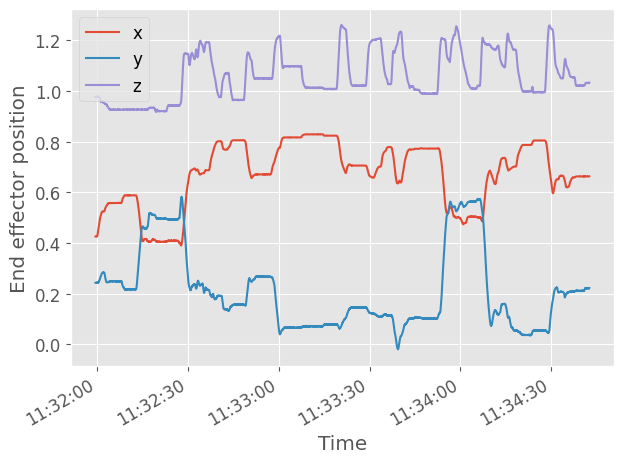

In [7]:
with plt.style.context("ggplot_perso.mplstyle"):
    # with plt.style.context("ggplot"):
    fig, ax = plt.subplots()
    # cmap = mpl.colormaps.get("tab10").colors
    ax.plot(traj.timestamps, traj.x, label="x")  # , color=cmap[0])
    ax.plot(traj.timestamps, traj.y, label="y")  # , color=cmap[1])
    ax.plot(traj.timestamps, traj.z, label="z")  # , color=cmap[2])
    ax.set_xlabel("Time")
    ax.set_ylabel("End effector position")
    ax.legend(loc="best")
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

In [8]:
# with plt.style.context("ggplot_perso.mplstyle"):
#     fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#     fig.suptitle("End effector position")
#     ax.plot(traj.x, traj.y, traj.z)
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_zlabel("z")
#     plt.show()

## Ground truth segmentation

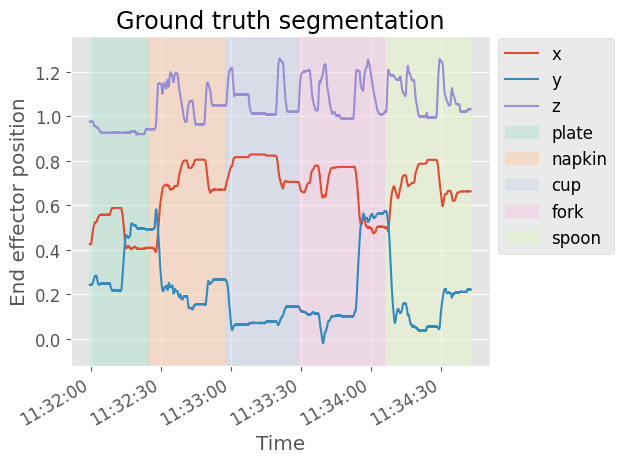

In [9]:
with plt.style.context("ggplot_perso.mplstyle"):
    fig, ax = plt.subplots()
    cmap = mpl.colormaps.get("Pastel2").colors
    ax.plot(traj.timestamps, traj.x, label="x")  # , color=cmap[0])
    ax.plot(traj.timestamps, traj.y, label="y")  # , color=cmap[1])
    ax.plot(traj.timestamps, traj.z, label="z")  # , color=cmap[2])

    fill_min = np.min([traj.x.min(), traj.y.min(), traj.z.min()])
    fill_max = np.max([traj.x.max(), traj.y.max(), traj.z.max()])
    for sect_i, sect_key in enumerate(task_ground_truth[filenum]["idx"].keys()):
        sect_dict_current = task_ground_truth[filenum]["idx"][sect_key]
        x = traj.timestamps[sect_dict_current["ini"] : sect_dict_current["end"]]
        ax.fill_between(
            x=x,
            y1=fill_min,
            y2=fill_max,
            color=cmap[sect_i],
            alpha=0.5,
            transform=ax.get_xaxis_transform(),
            label=sect_key,
        )

    ax.set_ylim(bottom=fill_min - 0.1, top=fill_max + 0.1)
    ax.set_xlabel("Time")
    ax.set_ylabel("End effector position")
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    ax.set_title("Ground truth segmentation")
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

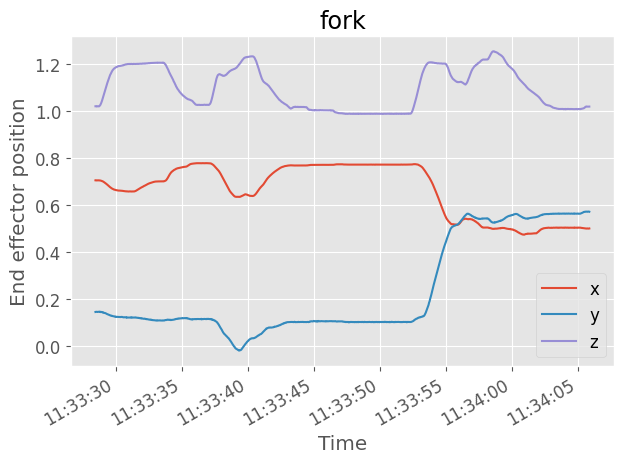

In [10]:
sect_key = "fork"
sect_dict_current = task_ground_truth[filenum]["idx"][sect_key]

with plt.style.context("ggplot_perso.mplstyle"):
    fig, ax = plt.subplots()
    cmap = mpl.colormaps.get("Pastel2").colors
    ax.plot(
        traj.timestamps[sect_dict_current["ini"] : sect_dict_current["end"]],
        traj.x[sect_dict_current["ini"] : sect_dict_current["end"]],
        label="x",
    )  # , color=cmap[0])
    ax.plot(
        traj.timestamps[sect_dict_current["ini"] : sect_dict_current["end"]],
        traj.y[sect_dict_current["ini"] : sect_dict_current["end"]],
        label="y",
    )  # , color=cmap[1])
    ax.plot(
        traj.timestamps[sect_dict_current["ini"] : sect_dict_current["end"]],
        traj.z[sect_dict_current["ini"] : sect_dict_current["end"]],
        label="z",
    )  # , color=cmap[2])
    ax.set_xlabel("Time")
    ax.set_ylabel("End effector position")
    ax.legend(loc="best")
    ax.set_title(sect_key)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

In [11]:
traj.z[sect_dict_current["ini"] : sect_dict_current["end"]]

3986    1.020806
3987    1.020688
3988    1.020904
3989    1.019882
3990    1.019882
          ...   
5661    1.019099
5662    1.019349
5663    1.019303
5664    1.019392
5665    1.019392
Name: z, Length: 1680, dtype: float64

In [12]:
# with plt.style.context("ggplot_perso.mplstyle"):
#     cmap = mpl.colormaps.get("tab10").colors
#     fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#     fig.suptitle("End effector position")

#     for sect_i, sect_key in enumerate(task_ground_truth[filenum]["idx"].keys()):
#         sect_dict_current = task_ground_truth[filenum]["idx"][sect_key]
#         ax.plot(
#             traj.x[sect_dict_current["ini"] : sect_dict_current["end"]],
#             traj.y[sect_dict_current["ini"] : sect_dict_current["end"]],
#             traj.z[sect_dict_current["ini"] : sect_dict_current["end"]],
#             color=cmap[sect_i],
#             label=sect_key,
#         )
#     ax.legend(loc="best")
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_zlabel("z")
#     fig.tight_layout()
#     plt.show()

## Extract frequency

In [13]:
dt = np.mean(np.diff(traj.timestamps))
dt

Timedelta('0 days 00:00:00.022218888')

In [14]:
freq = np.round(1 / dt.total_seconds())
freq

np.float64(45.0)

## Export timeseries to plain text files

In [15]:
datapath = datapath_root / "export"
datapath

PosixPath('data/PFCS/table task/export')

In [16]:
if not datapath.exists():
    datapath.mkdir(parents=True)

In [17]:
downsampling_factor = 10
for idx, demo in enumerate(task_ground_truth):
    traj = data2df(
        task_ground_truth=task_ground_truth,
        filenum=idx,
        datapath_root=datapath_root,
        timestamps=False,
    )
    if downsampling_factor > 1:
        traj_down = None
        for col in traj.columns:
            if traj_down is None:
                traj_down = signal.decimate(traj[col], q=downsampling_factor).T[
                    :, np.newaxis
                ]
            else:
                traj_down = np.concatenate(
                    [
                        traj_down,
                        signal.decimate(traj[col], q=downsampling_factor).T[
                            :, np.newaxis
                        ],
                    ],
                    axis=1,
                )
        np.savetxt(datapath.joinpath(f"{demo['filename']}_{idx}.txt"), traj_down)
    else:
        np.savetxt(datapath.joinpath(f"{demo['filename']}_{idx}.txt"), traj)

## Check exported/downsampled data

In [18]:
exported_files = list(datapath.glob("fetch*.txt"))
exported_files

[PosixPath('data/PFCS/table task/export/fetch_recorded_demo_1730997119_0.txt'),
 PosixPath('data/PFCS/table task/export/fetch_recorded_demo_1730997530_1.txt'),
 PosixPath('data/PFCS/table task/export/fetch_recorded_demo_1730997735_2.txt'),
 PosixPath('data/PFCS/table task/export/fetch_recorded_demo_1730997956_3.txt')]

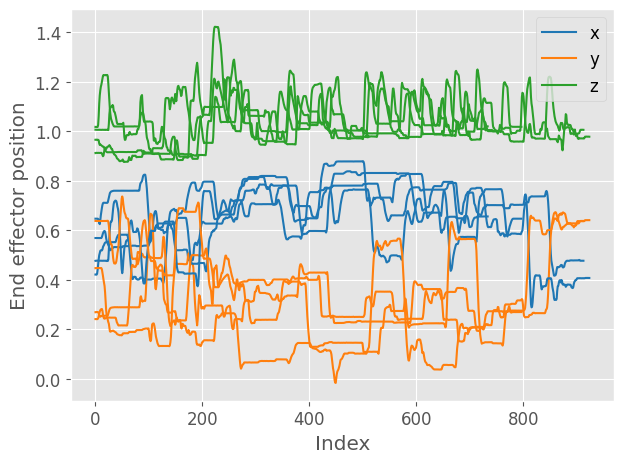

In [19]:
with plt.style.context("ggplot_perso.mplstyle"):
    # with plt.style.context("ggplot"):
    fig, ax = plt.subplots()
    cmap = mpl.colormaps.get("tab10").colors

    for idx, fname in enumerate(exported_files):
        data = np.loadtxt(fname)
        if idx == 0:
            ax.plot(data[:, 0], label="x", color=cmap[0])
            ax.plot(data[:, 1], label="y", color=cmap[1])
            ax.plot(data[:, 2], label="z", color=cmap[2])
        else:
            ax.plot(data[:, 0], color=cmap[0])
            ax.plot(data[:, 1], color=cmap[1])
            ax.plot(data[:, 2], color=cmap[2])
    ax.set_xlabel("Index")
    ax.set_ylabel("End effector position")
    ax.legend(loc="best")
    # fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

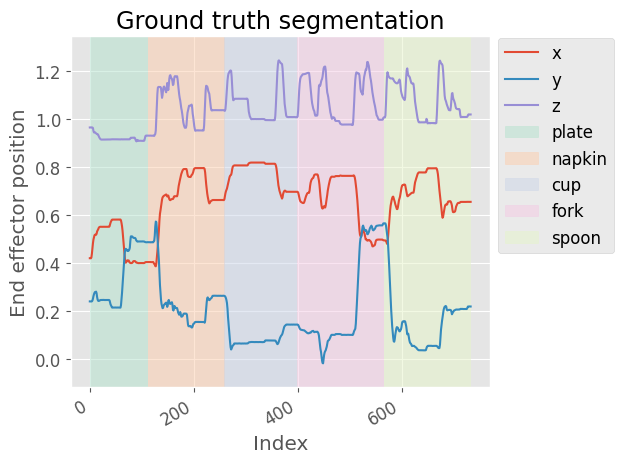

In [20]:
with plt.style.context("ggplot_perso.mplstyle"):
    fig, ax = plt.subplots()
    cmap = mpl.colormaps.get("Pastel2").colors

    data = np.loadtxt(exported_files[filenum])

    ax.plot(data[:, 0], label="x")  # , color=cmap[0])
    ax.plot(data[:, 1], label="y")  # , color=cmap[1])
    ax.plot(data[:, 2], label="z")  # , color=cmap[2])

    for sect_i, sect_key in enumerate(task_ground_truth[filenum]["idx"].keys()):
        sect_dict_current = task_ground_truth[filenum]["idx"][sect_key]
        sect_ini = int(sect_dict_current["ini"] / downsampling_factor)
        sect_end = int(sect_dict_current["end"] / downsampling_factor)
        x = np.arange(start=sect_ini, stop=sect_end)
        ax.fill_between(
            x=x,
            y1=data.min(),
            y2=data.max(),
            color=cmap[sect_i],
            alpha=0.5,
            transform=ax.get_xaxis_transform(),
            label=sect_key,
        )

    ax.set_ylim(bottom=data.min() - 0.1, top=data.max() + 0.1)
    ax.set_xlabel("Index")
    ax.set_ylabel("End effector position")
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    ax.set_title("Ground truth segmentation")
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

# GP-HSMM segmentation

In [21]:
gpsegm = GPSegmentation(
    dim=DIM,
    nclass=NCLASS,
    MAX_LEN=MAX_LEN,
    MIN_LEN=MIN_LEN,
    AVE_LEN=AVE_LEN,
    SKIP_LEN=SKIP_LEN,
)

In [22]:
gpsegm.load_data(exported_files)
modeldir = datapath / "learn"
gpsegm.load_model(modeldir)

In [23]:
gpsegm.recog()

  0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
classes = []
cut_points = []
for i, s in enumerate(gpsegm.segments[filenum]):
    c = gpsegm.segmclass[(filenum, i)]
    classes += [c for j in range(len(s))]
    cut_points += [0] * len(s)
    cut_points[-1] = 1

In [25]:
classes_id = np.unique(classes)
classes_id

array([0, 2, 3])

In [26]:
for idx, class_id in enumerate(classes_id):
    print(f"Class {class_id}: {np.argwhere(np.array(classes) == class_id).squeeze()}")

Class 0: [  0 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
 366 367 368 369 370 371 372 373 374 375 3

In [27]:
def find_subsegments(classes, class_id):
    select_idx = np.argwhere(np.array(classes) == class_id).squeeze()
    cut_pts = np.argwhere(np.diff(select_idx) > 1).squeeze(axis=1)
    # rm_idx = np.argwhere(np.logical_or(cut_pts == select_idx[0], cut_pts == select_idx[-1]))
    # cut_pts = np.delete(cut_pts, rm_idx, None)
    subsegms = []
    if cut_pts.any():
        subsegms.append(select_idx[0 : cut_pts[0]])
        if cut_pts.size > 1:
            for idx, cpt in enumerate(cut_pts[:-1]):
                subsegms.append(select_idx[cpt + 1 : cut_pts[idx + 1]])
        subsegms.append(select_idx[cut_pts[-1] + 1 : -1])
    else:
        subsegms.append(select_idx)
    subsegms = [item for item in subsegms if item.size > 0]
    return subsegms

In [28]:
for idx, class_id in enumerate(classes_id):
    subsegms = find_subsegments(classes=classes, class_id=class_id)
    print(f"Class {class_id}:")
    pprint(subsegms)

Class 0:
[array([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 31

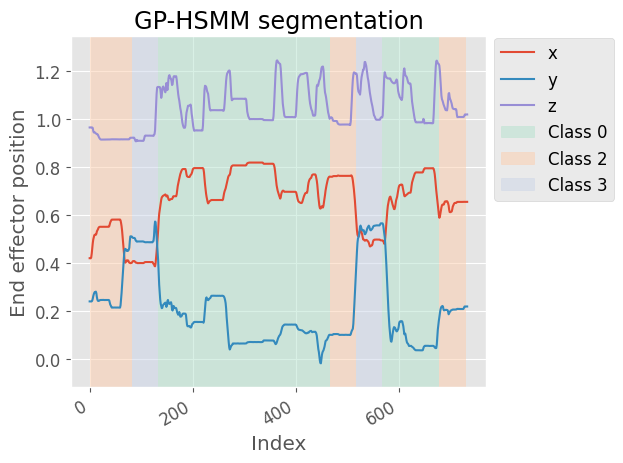

In [29]:
with plt.style.context("ggplot_perso.mplstyle"):
    fig, ax = plt.subplots()
    cmap = mpl.colormaps.get("Pastel2").colors

    data = gpsegm.data[filenum]
    classes_id = np.unique(classes)

    ax.plot(data[:, 0], label="x")  # , color=cmap[0])
    ax.plot(data[:, 1], label="y")  # , color=cmap[1])
    ax.plot(data[:, 2], label="z")  # , color=cmap[2])

    for idx, class_id in enumerate(classes_id):
        # select_idx = np.argwhere(np.array(classes) == class_id).squeeze()
        # x = select_idx[np.concat([[False], np.diff(select_idx) == 1])]
        subsegms = find_subsegments(classes=classes, class_id=class_id)
        for jdx, subsegm in enumerate(subsegms):
            if jdx == 0:
                ax.fill_between(
                    x=subsegm,
                    y1=data.min(),
                    y2=data.max(),
                    color=cmap[idx],
                    alpha=0.5,
                    transform=ax.get_xaxis_transform(),
                    label=f"Class {class_id}",
                )
            else:
                ax.fill_between(
                    x=subsegm,
                    y1=data.min(),
                    y2=data.max(),
                    color=cmap[idx],
                    alpha=0.5,
                    transform=ax.get_xaxis_transform(),
                    # label=f"Class {class_id}",
                )

    ax.set_ylim(bottom=data.min() - 0.1, top=data.max() + 0.1)
    ax.set_xlabel("Index")
    ax.set_ylabel("End effector position")
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    ax.set_title("GP-HSMM segmentation")
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()